# HW6 assignment1

In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import urllib2

s = json.load( open(os.getenv('PUIDATA')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#os.getenv('PUI2016')
os.getenv('PUIDATA')

'/home/cusp/ss9558/PUIdata'

In [3]:
# OPTION 2: Load CSV
#!curl -O 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'
#move to PUIDATA
#os.system("mkdir " + os.getenv("PUIDATA")) ##you have to make a new file directory first 
#os.system("mv " +"Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv"+ os.getenv("PUIDATA"))
#os.system("rm " + os.getenv("PUIDATA") + "/" + "Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [4]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + 
                               "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [5]:
def getpluto():
    os.system("mkdir " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
    os.system("mv " + "mn_mappluto_16v1.zip " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("unzip " + os.getenv("PUIDATA") + "/Manhattan/" + "mn_mappluto_16v1.zip -d " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("rm " + os.getenv("PUIDATA") + "/Manhattan/mn_mappluto_16v1.zip")

In [6]:
getpluto()

In [7]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA")+"/Manhattan/MNMapPLUTO.shp")
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [8]:
# make sure you clean up your data and throw away columns you do not need!
nrg=nrg[['NYC Borough, Block, and Lot (BBL)','Site EUI(kBtu/ft2)',\
         'Reported Property Floor Area (Building(s)) (ft²)',\
         'DOF Property Floor Area (Buildngs and Parking)(ft2)','DOF Number of Buildings']]

In [9]:
bsize = bsize[['BBL','BldgArea','SanitBoro','SanitDist','SanitSub',\
            'UnitsRes','UnitsTotal','YearBuilt','ZipCode','geometry']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06814e7dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f06b593e690>]], dtype=object)

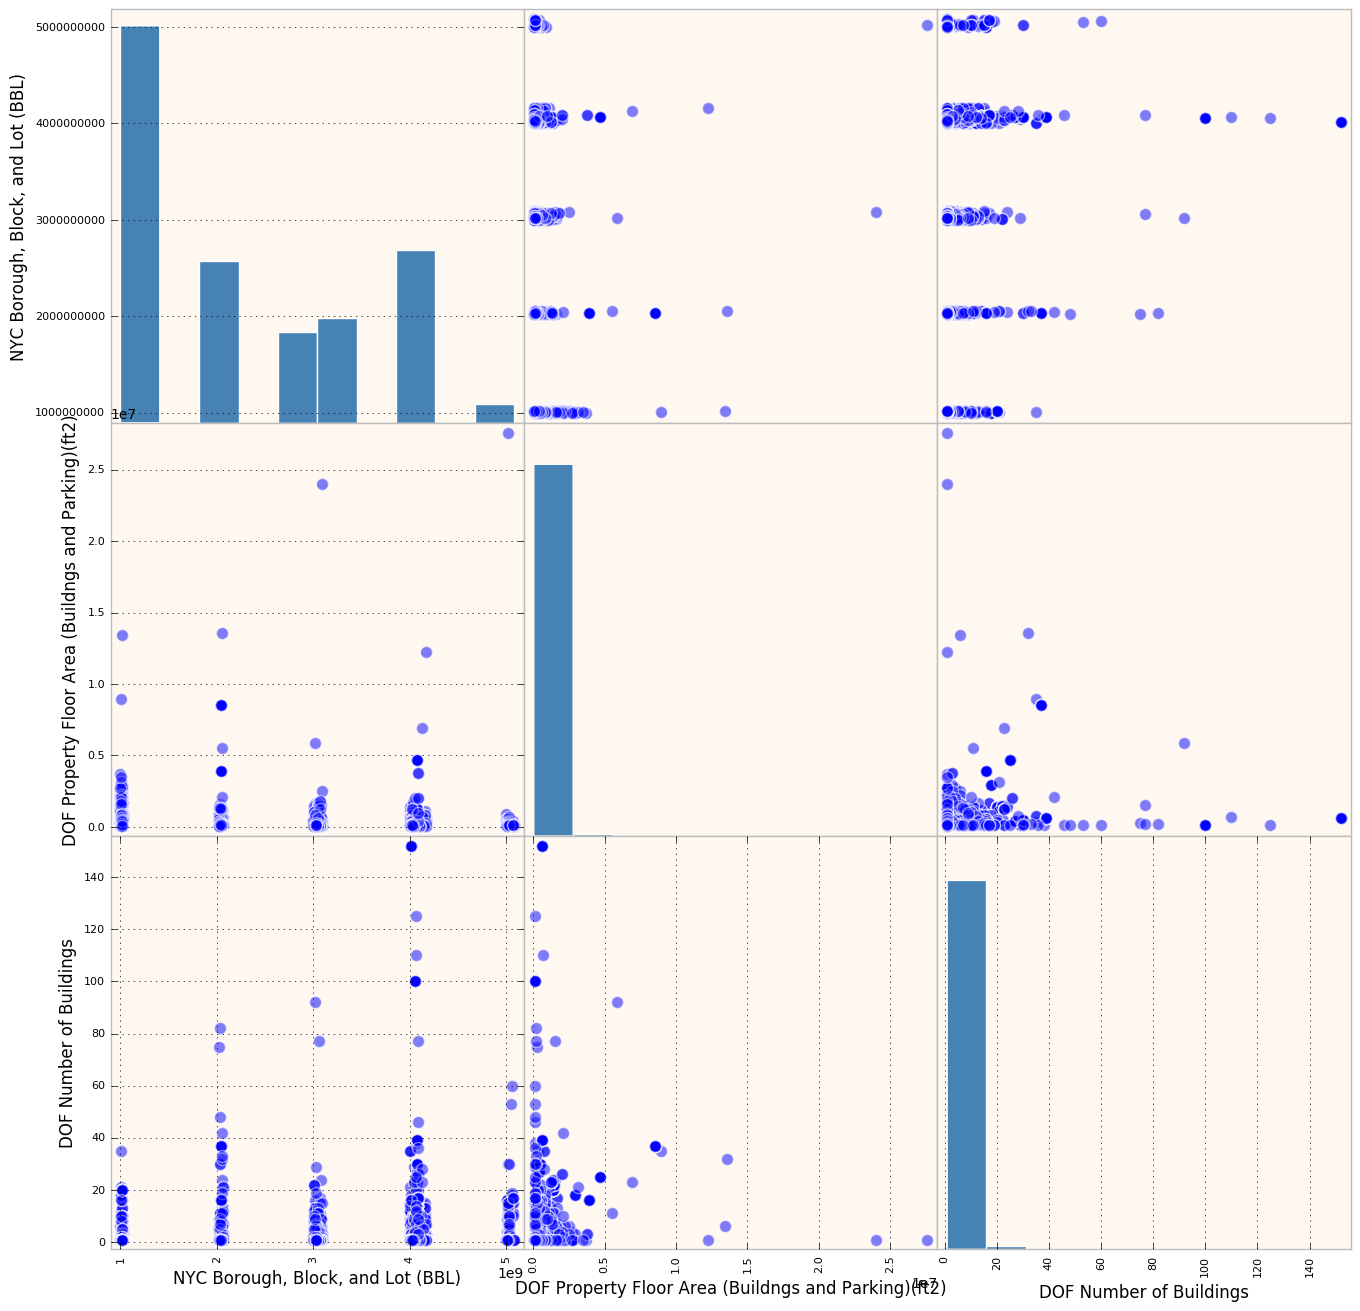

In [10]:
#try make a scatter plot of nrg. Few columns will plot
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

## Figure 1: scatter matrix of all numerical values in the files.

### Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.
### This has to be done entry by entry: if you give it a series you get error "cannot convert the series to..."
### However you can pass it a whole array by using it in conjunction with np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.

In [11]:
BBL = nrg['NYC Borough, Block, and Lot (BBL)']
Site = nrg['Site EUI(kBtu/ft2)']
RepFA = nrg['Reported Property Floor Area (Building(s)) (ft²)']
DOFFA = nrg['DOF Property Floor Area (Buildngs and Parking)(ft2)']
nB = nrg['DOF Number of Buildings']

In [12]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
        


Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that I want to use from my arrays of interest. 

I can replace the entries that failed to be converted to 'NaN'
(because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx) 

In [13]:
vfunc = np.vectorize(canconvert)
BBL_indx=vfunc(BBL)
Site_indx = vfunc(Site) 
RepFA_indx = vfunc(RepFA) 

In [14]:
BBL[~BBL_indx] = float('NaN')
Site[~Site_indx] = float('NaN')
RepFA[~RepFA_indx]= float('NaN')

In [15]:
##check that your conversion worked: e.g.
print (nrg['Site EUI(kBtu/ft2)'].astype(float))
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
bsize.BBL.astype(float)
#this should not return an error
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!


Record Number
12086      NaN
14354      NaN
12150      NaN
12590      NaN
15591      NaN
12135      NaN
8523       NaN
15920      NaN
14241      NaN
15925      NaN
9685       NaN
7540       NaN
14360      NaN
10588      NaN
14423      NaN
12515      NaN
3028     125.4
14609      NaN
12096      NaN
6666       NaN
8914       NaN
11586      NaN
11714      NaN
14307      NaN
12761      NaN
12091      NaN
16027      NaN
13378      NaN
14911      NaN
15103      NaN
         ...  
14559      NaN
14560      NaN
14748      NaN
14753      NaN
13582      NaN
13947      NaN
14777      NaN
14779      NaN
14409      NaN
13262      NaN
13261      NaN
12523      NaN
12529      NaN
12536      NaN
13929      NaN
13944      NaN
13945      NaN
13821      NaN
13829      NaN
13837      NaN
13838      NaN
13847      NaN
14352      NaN
12976      NaN
12978      NaN
12984      NaN
12987      NaN
12988      NaN
13472      NaN
13482      NaN
Name: Site EUI(kBtu/ft2), dtype: float64


0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [16]:
# prepare your BBL columns
nrg.rename(index = str, columns = {'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace = True)
nrg.columns

Index([u'BBL', u'Site EUI(kBtu/ft2)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'DOF Number of Buildings'],
      dtype='object')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:1237: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0681b2bfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f06b0bccdd0>]], dtype=object)

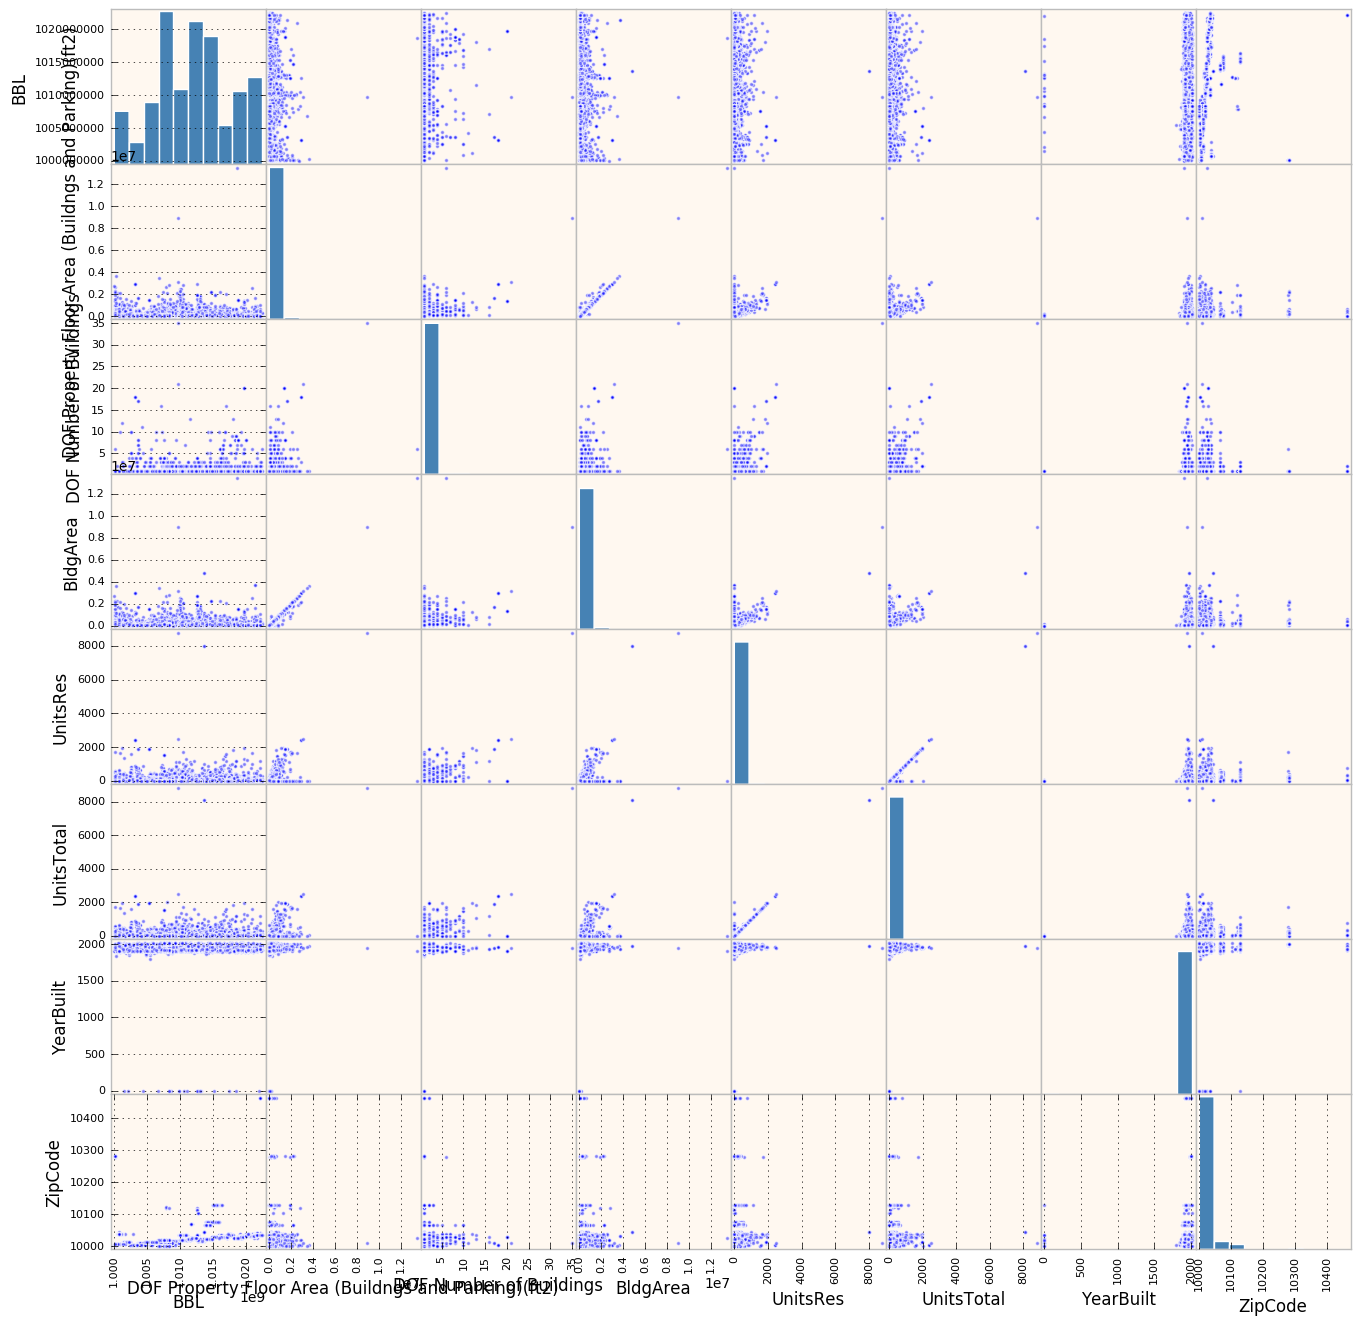

In [17]:
#merge
bblnrgdata =pd.merge(nrg,bsize,how="inner",on='BBL')

# Now the scatter matrix plot should show more columns.
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

In [18]:
bblnrgdata.columns

Index([                                                u'BBL',
                                        u'Site EUI(kBtu/ft2)',
          u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
                                   u'DOF Number of Buildings',
                                                  u'BldgArea',
                                                 u'SanitBoro',
                                                 u'SanitDist',
                                                  u'SanitSub',
                                                  u'UnitsRes',
                                                u'UnitsTotal',
                                                 u'YearBuilt',
                                                   u'ZipCode',
                                                  u'geometry'],
      dtype='object')

In [19]:
bblnrgdata['energy'] =  bblnrgdata['Site EUI(kBtu/ft2)'].astype(float)*\
bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

In [20]:
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,BldgArea,SanitBoro,SanitDist,SanitSub,UnitsRes,UnitsTotal,YearBuilt,ZipCode,geometry,energy
0,1.006700e+09,NaN,NaN,440360.0,1.0,440360,1,04,2B,0,1,1987,10001,"POLYGON ((982544.9469999969 212642.9668000042,...",NaN
1,1.004370e+09,NaN,NaN,52390.0,1.0,52390,1,03,4B,0,4,1920,10009,"POLYGON ((988632.9397999942 204610.9329999983,...",NaN
2,1.013110e+09,125.4,330000,313200.0,1.0,313200,1,06,3B,0,56,1977,10022,"POLYGON ((993141.1744000018 216172.3948000073,...",41382000.0
3,1.009220e+09,NaN,NaN,98260.0,1.0,98260,1,06,1A,148,148,1963,10003,"POLYGON ((989369.5851999968 206338.7575999945,...",NaN
4,1.007400e+09,NaN,68329,NaN,NaN,48800,1,04,1A,0,1,1920,10011,"POLYGON ((983418.6007999927 209632.8701999933,...",NaN


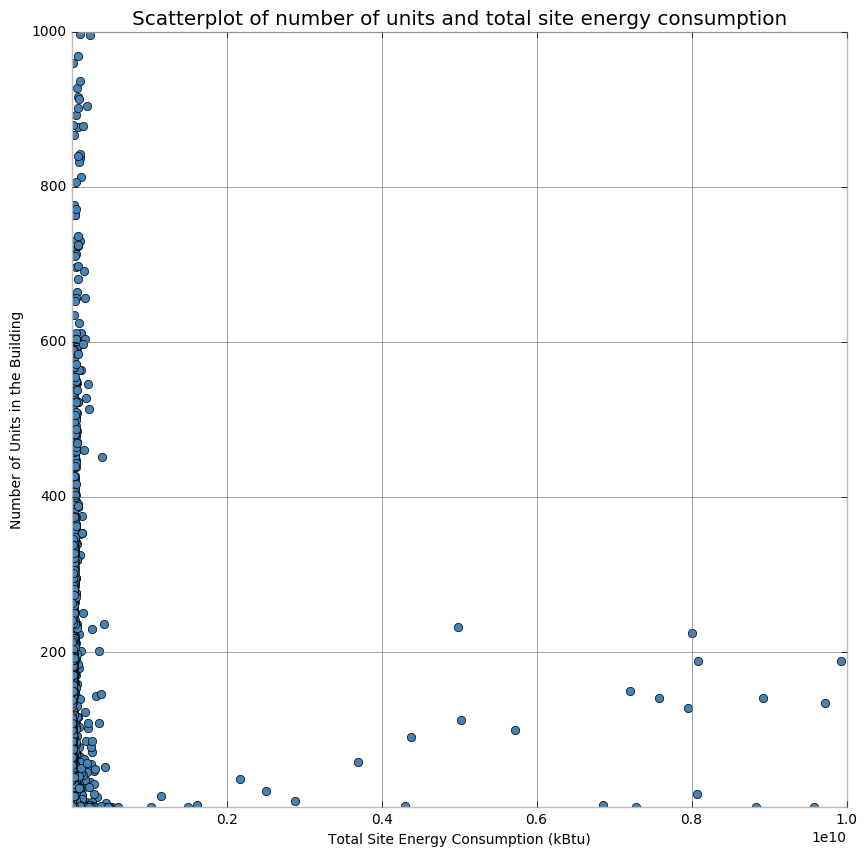

In [21]:
# first scatter plot
x = bblnrgdata['energy']
y = bblnrgdata['UnitsTotal']
fig = pl.figure(7,figsize=(10,10))
#add a subplot
ax=fig.add_subplot(111,axisbg="white")
#grid
ax.xaxis.grid(True, which="major", linestyle='-', color='grey') 
ax.yaxis.grid(True, which="major", linestyle='-', color='grey')
# set axes ranges
plt.axis([1000, 1e10, 1, 1000])
#label
ax.set_xlabel("Total Site Energy Consumption (kBtu)", fontsize=10)
ax.set_ylabel("Number of Units in the Building", fontsize=10)
ax.set_title("Scatterplot of number of units and total site energy consumption")
#plot
ax.plot(x,y,'o',color='SteelBlue')

when the points in a plot all look scrunched against the axis 

**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



In [22]:
bblnrgdata.UnitsTotal.describe()
bblnrgdata[bblnrgdata.UnitsTotal>2000]

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,BldgArea,SanitBoro,SanitDist,SanitSub,UnitsRes,UnitsTotal,YearBuilt,ZipCode,geometry,energy
4609,1.013730e+09,53.7,1125341,NaN,NaN,4786701,1,08,None,8018,8088,1975,10044,"POLYGON ((1000788.062800005 220544.2284000069,...",60430811.7
4610,1.013730e+09,70.7,469841,NaN,NaN,4786701,1,08,None,8018,8088,1975,10044,"POLYGON ((1000788.062800005 220544.2284000069,...",33217758.7
4638,1.003230e+09,NaN,NaN,2948300.0,18.0,2948300,1,03,3A,2391,2391,1962,10002,"POLYGON ((991028.5124000013 200678.6819999963,...",NaN
4639,1.003230e+09,NaN,1993701,2948300.0,18.0,2948300,1,03,3A,2391,2391,1962,10002,"POLYGON ((991028.5124000013 200678.6819999963,...",NaN
4640,1.003230e+09,103.4,2134664,2948300.0,18.0,2948300,1,03,3A,2391,2391,1962,10002,"POLYGON ((991028.5124000013 200678.6819999963,...",220724257.6
4641,1.003230e+09,18.100000000000001,140963,2948300.0,18.0,2948300,1,03,3A,2391,2391,1962,10002,"POLYGON ((991028.5124000013 200678.6819999963,...",2551430.3
4963,1.009720e+09,57.7,9515627,8942176.0,35.0,8942176,1,06,1A,8759,8805,1945,10009,"POLYGON ((991411.2186000049 205584.4648000002,...",549051677.9
5036,1.009780e+09,65.8,2680650,3122165.0,21.0,3122165,1,06,1B,2491,2498,1947,10010,"POLYGON ((991161.3602000028 206891.7880000025,...",176386770.0


In [28]:
#remove outliers
#only keep the data which energy > 1000 and the unit < 2000
bblnrgdata_cut = bblnrgdata[bblnrgdata.energy>1000]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal>10]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal<2000]

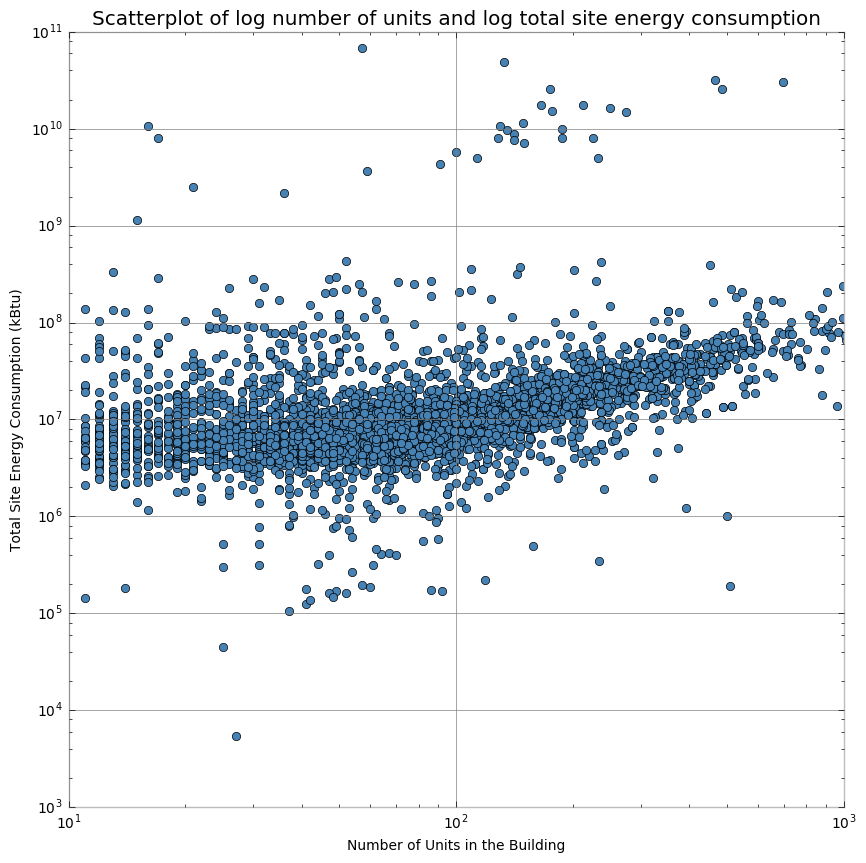

In [30]:
x = bblnrgdata_cut['energy']
y = bblnrgdata_cut['UnitsTotal']
fig = pl.figure(7,figsize=(10,10))
#add a subplot
ax=fig.add_subplot(111,axisbg="white")
#grid
ax.xaxis.grid(True, which="major", linestyle='-', color='grey') 
ax.yaxis.grid(True, which="major", linestyle='-', color='grey')
# set axes ranges
plt.axis([10, 1000, 1000, 100000000000])
#label
ax.set_xlabel("Number of Units in the Building", fontsize=10)
ax.set_ylabel("Total Site Energy Consumption (kBtu)", fontsize=10)
ax.set_title("Scatterplot of log number of units and log total site energy consumption")
#plot
ax.loglog(y,x,'o',color='SteelBlue')

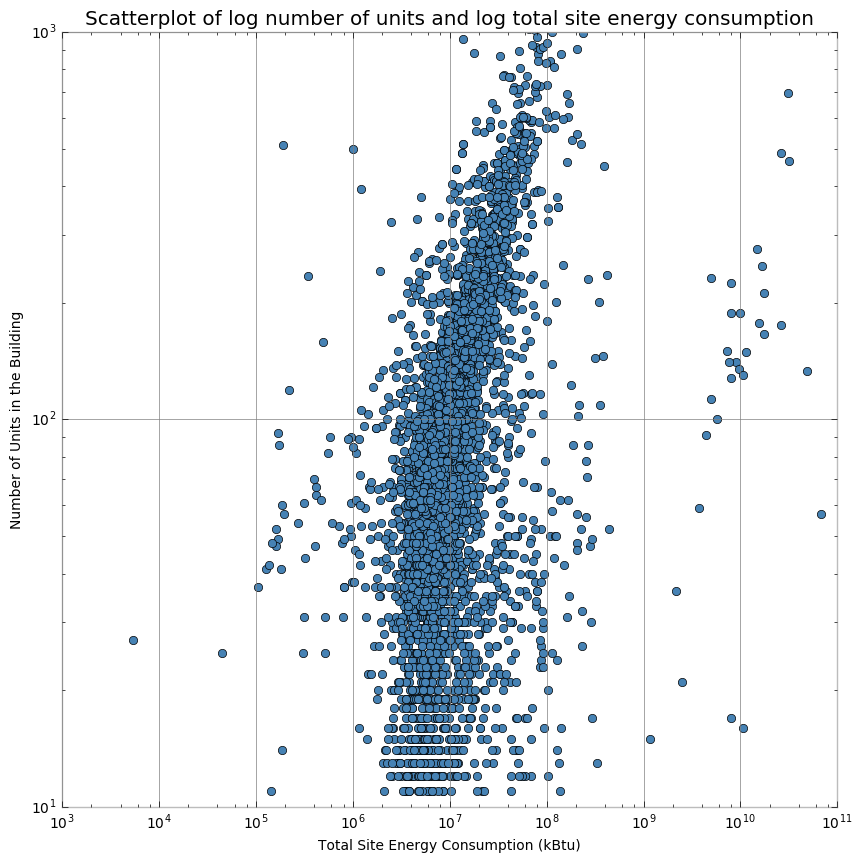

In [31]:
#log plot
x = bblnrgdata_cut['energy']
y = bblnrgdata_cut['UnitsTotal']
fig = pl.figure(7,figsize=(10,10))
#add a subplot
ax=fig.add_subplot(111,axisbg="white")
#grid
ax.xaxis.grid(True, which="major", linestyle='-', color='grey') 
ax.yaxis.grid(True, which="major", linestyle='-', color='grey')
# set axes ranges
plt.axis([1000, 100000000000,10, 1000])
#label
ax.set_xlabel("Total Site Energy Consumption (kBtu)", fontsize=10)
ax.set_ylabel("Number of Units in the Building", fontsize=10)
ax.set_title("Scatterplot of log number of units and log total site energy consumption")
#plot
ax.loglog(x,y,'o',color='SteelBlue')

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


In [82]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
x = bblnrgdata_cut['energy']
y = bblnrgdata_cut['UnitsTotal']

## Fit a line to Units VS Energy

In [47]:
X = sm.add_constant(np.log10(y))
model1 = sm.OLS(np.log10(x), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     883.4
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          1.46e-176
Time:                        10:04:59   Log-Likelihood:                -2552.7
No. Observations:                4259   AIC:                             5109.
Df Residuals:                    4257   BIC:                             5122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.0849      0.033    186.383      0.000         6.021     6.149
UnitsTotal     0.5004      0.017     29.722      0.000         0.467     0.533
==============================================================================
Omnibus:                     2255.161   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45516.185
Skew:                           2.075   Prob(JB):                         0.00
Kurtosis:                      18.468   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

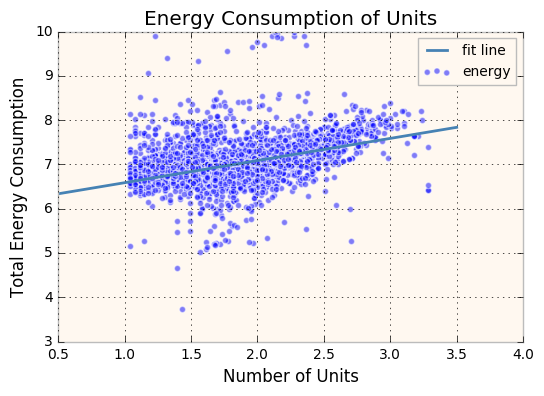

In [54]:
pl.scatter(log10(y), log10(x), alpha=0.5)
x_fit = np.linspace(0.5, 3.5, 1000)
X_fit = sm.add_constant(x_fit)
plot(x_fit, model1.predict(X_fit), label='fit line')
pl.ylabel('Total Energy Consumption')
pl.xlabel('Number of Units')
pl.title('Energy Consumption of Units')
pl.xlim(0.5, 4)
pl.ylim(3,10)
pl.legend(loc='best')

## Fit a line to Energy(X) VS Units(Y)

In [55]:
X = sm.add_constant(np.log10(x))
model2 = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     883.4
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          1.46e-176
Time:                        10:11:41   Log-Likelihood:                -1751.2
No. Observations:                4259   AIC:                             3506.
Df Residuals:                    4257   BIC:                             3519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.5186      0.081     -6.365      0.000        -0.678    -0.359
energy         0.3434      0.012     29.722      0.000         0.321     0.366
==============================================================================
Omnibus:                      107.859   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.190
Skew:                          -0.325   Prob(JB):                     1.97e-29
Kurtosis:                       3.568   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

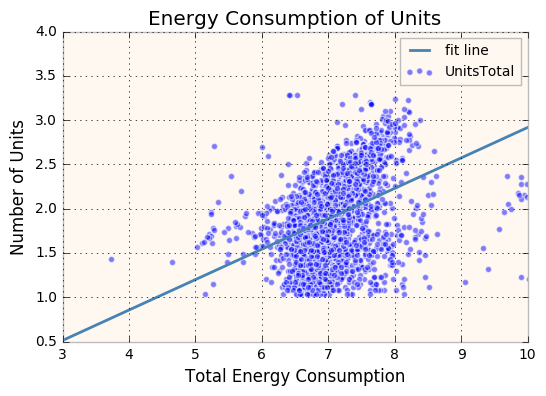

In [57]:
pl.scatter(log10(x), log10(y), alpha=0.5)
x_fit = np.linspace(3, 12, 1000)
X_fit = sm.add_constant(x_fit)
plot(x_fit, model2.predict(X_fit), label='fit line')
pl.ylabel('Number of Units')
pl.xlabel('Total Energy Consumption')
pl.title('Energy Consumption of Units')
pl.ylim(0.5, 4)
pl.xlim(3,10)
pl.legend(loc='best')

## 3 Evaluate which is better by calculating the chi square

In [90]:
def chisq(model,data):
    chi=0
    for i in range(len(model)):
        chi=chi+(model[i]-data[i])**2/data[i]
    return chi

In [98]:
#chi square for model 1
chisq1=chisq(model1.predict(sm.add_constant(log10(y))),np.array(log10(x)))
chisq1

109.58102488535334

In [99]:
#chi square for model 2
chisq2=chisq(model2.predict(sm.add_constant(log10(x))),np.array(log10(y)))
chisq2

343.01216726533261

In [102]:
#Degree of freedom
DOF = len(bblnrgdata_cut) - 2 - 1
DOF

4256

In [103]:
print ("Chi-square Goodness of fit for model 1: ", chisq1 / DOF)

Chi-square Goodness of fit for model 1:  0.0257474212607


In [101]:
print ("Chi-square Goodness of fit for model 2: ", chisq2 / DOF)

Chi-square Goodness of fit for model 2:  0.0805949641131


## 4.Fit a 2nd degree polynomial

In [80]:
polyfit = pd.DataFrame()
polyfit['X'] = np.log10(bblnrgdata_cut['UnitsTotal'])
polyfit['Y'] = np.log10(bblnrgdata_cut['energy'])
polyfit['X2'] = np.log10(bblnrgdata_cut['UnitsTotal'])**2

In [81]:
polyfit.head()

,X,Y,X2
2,1.748188,7.616811,3.056161
16,1.380211,7.629287,1.904983
18,1.380211,7.286094,1.904983
19,1.792392,6.950549,3.212668
20,1.929419,6.811909,3.722657


In [83]:
modelpoly = smf.ols(formula = 'Y ~ X + X2', data=polyfit).fit()

In [84]:
modelpoly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     589.7
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          9.01e-227
Time:                        10:35:57   Log-Likelihood:                -2433.4
No. Observations:                4259   AIC:                             4873.
Df Residuals:                    4256   BIC:                             4892.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7417      0.110     70.092      0.000         7.525     7.958
X             -1.2808      0.115    -11.146      0.000        -1.506    -1.056
X2             0.4581      0.029     15.661      0.000         0.401     0.515
==============================================================================
Omnibus:                     2328.097   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57751.237
Skew:                           2.101   Prob(JB):                         0.00
Kurtosis:                      20.544   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

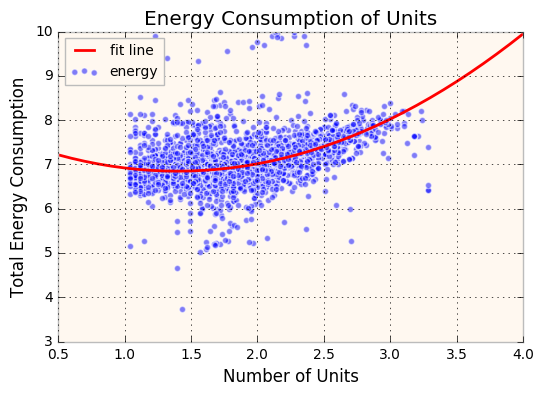

In [89]:
pl.scatter(log10(y), log10(x), alpha=0.5)
polyfit2 = pd.DataFrame()
polyfit2['X'] = np.arange(0.5,4.5,0.1)
polyfit2['X2'] =polyfit2['X']**2
plot(polyfit2['X'], modelpoly.predict(polyfit2), label='fit line',color='red')
pl.ylabel('Total Energy Consumption')
pl.xlabel('Number of Units')
pl.title('Energy Consumption of Units')
pl.xlim(0.5, 4)
pl.ylim(3,10)
pl.legend(loc='best')

## 5. Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test.

In [108]:
print ("LR : ", -2 * (model1.llf - modelpoly.llf))

LR :  238.62395769


In [106]:
print ("LR from statsmodels:", modelpoly.compare_lr_test(model1))

LR from statsmodels: (238.62395768962506, 7.8477957521120225e-54, 1.0)


With degree of freedom=1 and significance level=0.05, the critical value is 3.84. LR is larger than
3.84, we can not reject the null hypothesis. 
The curve model (modelpoly) is not better than the line model (model1).

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

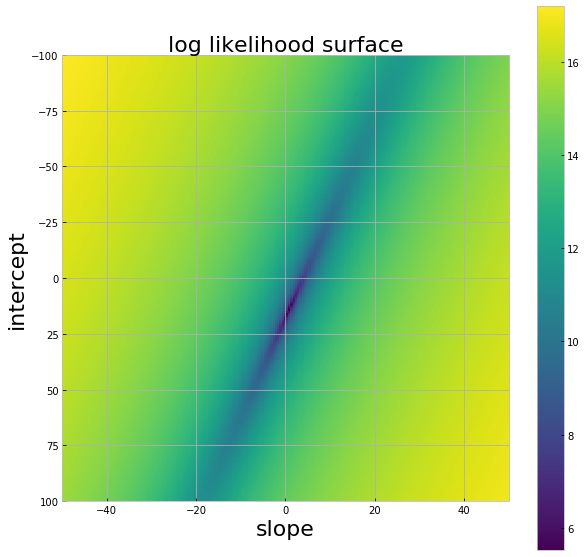

In [42]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,0,'total energy consumption (kBtu)')

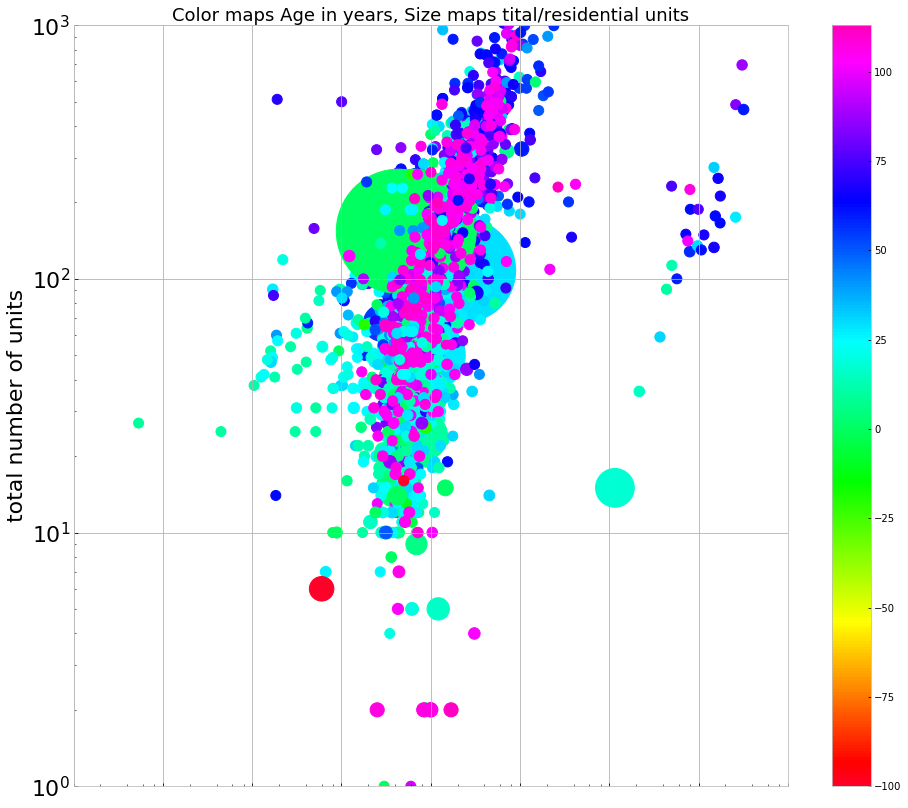

In [49]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)